In [38]:
import pandas as pd


with open(r"C:\Users\user\Desktop\Saar-dex.csv", encoding='utf8', errors= 'ignore') as f:
    data = pd.read_csv(f)
    print(data.head())


   Unnamed: 0.1  Unnamed: 0       company_name  rating  location  \
0             0           0     Kern (Germany)     4.0  Saarland   
1             1           1  NEUE HALBERG-GUSS     3.4  Saarland   
2             2           4       MTD Products     3.5  Saarland   
3             3           5            Primark     3.5  Saarland   
4             4           6         Groupe PSA     3.5  Saarland   

                      size                                 industry  \
0        1 to 50 Employees  Enterprise Software & Network Solutions   
1   1001 to 5000 Employees   Transportation Equipment Manufacturing   
2  5001 to 10000 Employees                  Machinery Manufacturing   
3         10000+ Employees       Department, Clothing & Shoe Stores   
4         10000+ Employees   Transportation Equipment Manufacturing   

  street_number            street_name         town  ...  \
0           120         In der Kolling      Bexbach  ...   
1            16            Kirchstraße  Saar

In [39]:
#calculate size of each industry
from collections import Counter

tmp = Counter(data['industry'])
tmp

Counter({'Enterprise Software & Network Solutions': 8,
         'Transportation Equipment Manufacturing': 9,
         'Machinery Manufacturing': 9,
         'Department, Clothing & Shoe Stores': 14,
         'Banking & Lending': 9,
         'Energy & Utilities': 9,
         'Consumer Product Manufacturing': 9,
         'HR Consulting': 13,
         'Health Care Services & Hospitals': 10,
         'Home Furniture & Housewares Stores': 8,
         'Information Technology Support Services': 12})

In [40]:
#delete the unnnamed column
data = data.iloc[:, 2:]

# Display the updated DataFrame
print(data)


                      company_name  rating  location                     size  \
0                   Kern (Germany)     4.0  Saarland        1 to 50 Employees   
1                NEUE HALBERG-GUSS     3.4  Saarland   1001 to 5000 Employees   
2                     MTD Products     3.5  Saarland  5001 to 10000 Employees   
3                          Primark     3.5  Saarland         10000+ Employees   
4                       Groupe PSA     3.5  Saarland         10000+ Employees   
..                             ...     ...       ...                      ...   
105                           Atos     3.7  Saarland         10000+ Employees   
106  Saarschmiede Freiformschmiede     4.0  Saarland   1001 to 5000 Employees   
107                Villeroy & Boch     3.9  Saarland  5001 to 10000 Employees   
108                         Unimed     4.3  Saarland   1001 to 5000 Employees   
109                     Lands' End     3.4  Saarland  5001 to 10000 Employees   

                           

In [41]:
print(data['industry'].unique())

['Enterprise Software & Network Solutions'
 'Transportation Equipment Manufacturing' 'Machinery Manufacturing'
 'Department, Clothing & Shoe Stores' 'Banking & Lending'
 'Energy & Utilities' 'Consumer Product Manufacturing' 'HR Consulting'
 'Health Care Services & Hospitals' 'Home Furniture & Housewares Stores'
 'Information Technology Support Services']


In [42]:

#resetting index
data = data.reset_index(drop=True)

In [43]:
#import libraries for visualization
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [44]:
#Visualization of size of businesses in each industry


# Group the data by industry and size, and calculate the count of each combination
grouped_data = data.groupby(['industry', 'size']).size().reset_index(name='count')

# Iterate over each industry label
for industry in grouped_data['industry'].unique():
    # Filter the data for the specific industry
    industry_data = grouped_data[grouped_data['industry'] == industry]
    
    # Create the pie chart using Plotly Express
    fig = px.pie(industry_data, values='count', names='size', title=f'{industry} Industry')
    
    # Customize the appearance of the pie chart
    fig.update_traces(textposition='inside', textinfo='percent')
    
    # Show the interactive pie chart
    fig.show()


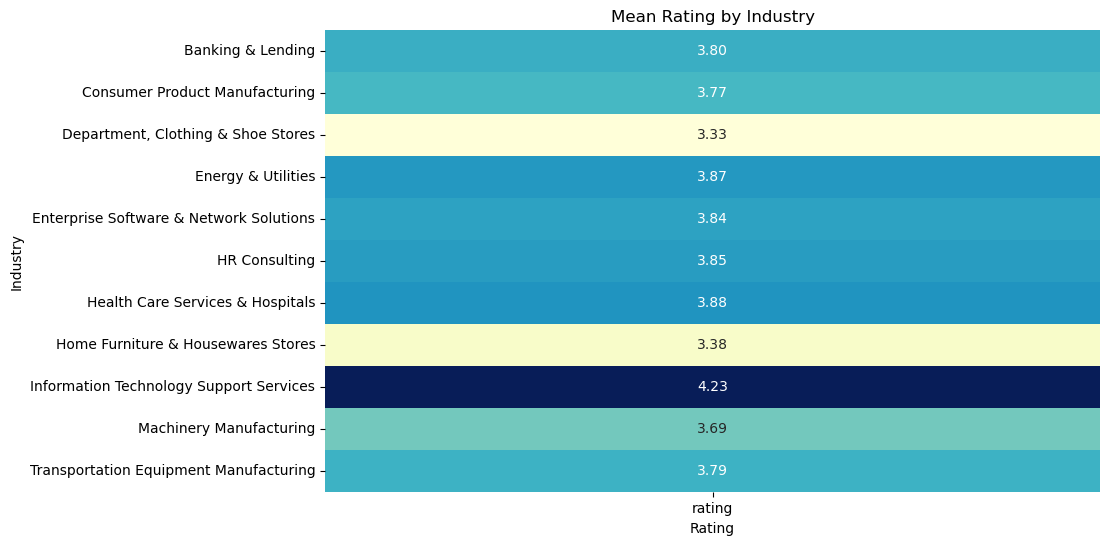

In [45]:
#visualization of rating per industry (heatmap)


# Pivot the data to create a matrix of mean ratings by industry
heatmap_data = data.pivot_table(values='rating', index='industry', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f", cbar=False)
plt.title('Mean Rating by Industry')
plt.xlabel('Rating')
plt.ylabel('Industry')
plt.show()


In [46]:

# visualization of mean rating by industry (bar chart)

# Calculate the mean rating by industry
mean_rating_by_industry = data.groupby('industry')['rating'].mean().reset_index()

# Calculate the overall mean rating
overall_mean_rating = data['rating'].mean()

# Create a trace for the mean rating per industry
trace_industry = go.Bar(x=mean_rating_by_industry['rating'], y=mean_rating_by_industry['industry'],
                        orientation='h', name='Mean Rating by Industry',
                        hovertemplate='%{x:.2f}')

# Create a trace for the overall mean rating
trace_mean = go.Bar(x=[overall_mean_rating], y=['Overall Mean'], orientation='h', name='Overall Mean Rating',
                    hovertemplate='%{x:.2f}')

data_visualization = [trace_industry, trace_mean]

layout = go.Layout(title='Mean Rating by Industry',
                   xaxis=dict(title='Mean Rating'),
                   yaxis=dict(title='Industry'),
                   barmode='group')

fig = go.Figure(data=data_visualization, layout=layout)

fig.show()




In [47]:
#visualization of industry size
# Count the number of companies in each industry
industry_counts = data['industry'].value_counts().reset_index()
industry_counts.columns = ['industry', 'count']

# Create the pie chart using Plotly Express
fig = px.pie(industry_counts, values='count', names='industry', title='Number of Companies in Each Industry')

# Customize the appearance of the pie chart
fig.update_traces(textposition='inside', textinfo='percent')

# Show the interactive pie chart
fig.show()


In [48]:
import pandas as pd

data = {
    '': ['Beckingen', 'Bexbach', 'Blieskastel', 'Lebach', 'Mettlach', 'Neunkirchen', 'Püttlingen', 'Saarbrücken', 'Sankt Ingbert', 'Sankt Wendel', 'Völklingen', 'Wadern', 'avg / total'],
    'precision': [1.00, 0.00, 1.00, 1.00, 0.00, 1.00, 1.00, 1.00, 1.00, 1.00, 0.00, 0.00, 0.91],
    'recall': [1.00, 0.00, 1.00, 1.00, 0.00, 1.00, 1.00, 1.00, 1.00, 1.00, 0.00, 0.00, 0.91],
    'f1-score': [1.00, 0.00, 1.00, 1.00, 0.00, 1.00, 1.00, 1.00, 1.00, 1.00, 0.00, 0.00, 0.91],
    'support': [1, 1, 1, 1, 0, 2, 1, 12, 1, 1, 0, 1, 22]
}

df = pd.DataFrame(data)
df = df.set_index('')

print(df)


               precision  recall  f1-score  support
                                                   
Beckingen           1.00    1.00      1.00        1
Bexbach             0.00    0.00      0.00        1
Blieskastel         1.00    1.00      1.00        1
Lebach              1.00    1.00      1.00        1
Mettlach            0.00    0.00      0.00        0
Neunkirchen         1.00    1.00      1.00        2
Püttlingen          1.00    1.00      1.00        1
Saarbrücken         1.00    1.00      1.00       12
Sankt Ingbert       1.00    1.00      1.00        1
Sankt Wendel        1.00    1.00      1.00        1
Völklingen          0.00    0.00      0.00        0
Wadern              0.00    0.00      0.00        1
avg / total         0.91    0.91      0.91       22


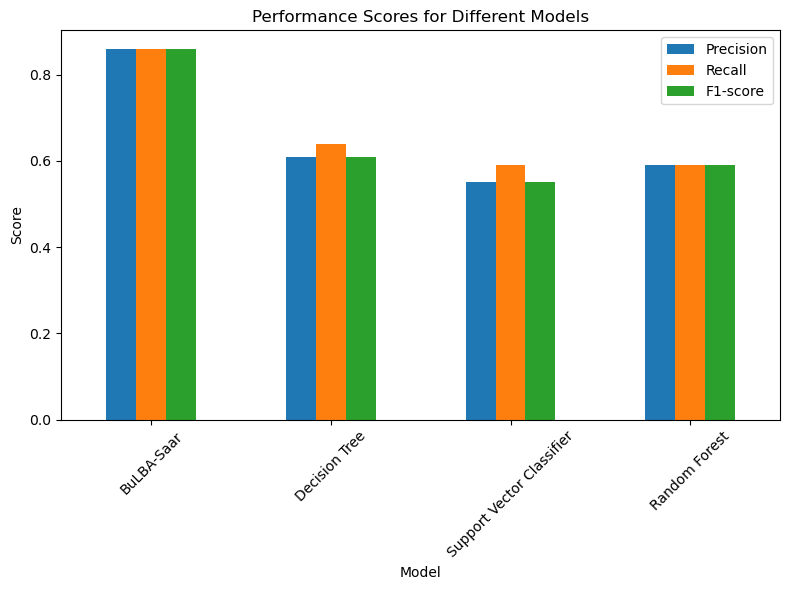

In [50]:


# Create a DataFrame with the model scores
data = {
    'Model': ['BuLBA-Saar', 'Decision Tree', 'Support Vector Classifier', 'Random Forest'],
    'Precision': [0.86, 0.61, 0.55, 0.59],
    'Recall': [0.86, 0.64, 0.59, 0.59],
    'F1-score': [0.86, 0.61, 0.55, 0.59]
}

df = pd.DataFrame(data)

# Plot the scores
fig, ax = plt.subplots(figsize=(8, 6))
df.set_index('Model').plot(kind='bar', ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Performance Scores for Different Models')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
